In [ ]:
Prediction to classify the searching (Exoplanets) planet_type

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv (r'/content/cleaned_5250.csv')
df

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764.0,10.52100,Gas Giant,2019,0.70900,Jupiter,1.373,Jupiter,0.044210,0.007940,0.04,Transit
5246,YSES 2 b,357.0,10.88500,Gas Giant,2021,6.30000,Jupiter,1.140,Jupiter,115.000000,1176.500000,0.00,Direct Imaging
5247,YZ Ceti b,12.0,12.07400,Terrestrial,2017,0.70000,Earth,0.913,Earth,0.016340,0.005476,0.06,Radial Velocity
5248,YZ Ceti c,12.0,12.07400,Super Earth,2017,1.14000,Earth,1.050,Earth,0.021560,0.008487,0.00,Radial Velocity


In [ ]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               5250 non-null   object 
 1   distance           5233 non-null   float64
 2   stellar_magnitude  5089 non-null   float64
 3   planet_type        5250 non-null   object 
 4   discovery_year     5250 non-null   int64  
 5   mass_multiplier    5227 non-null   float64
 6   mass_wrt           5227 non-null   object 
 7   radius_multiplier  5233 non-null   float64
 8   radius_wrt         5233 non-null   object 
 9   orbital_radius     4961 non-null   float64
 10  orbital_period     5250 non-null   float64
 11  eccentricity       5250 non-null   float64
 12  detection_method   5250 non-null   object 
dtypes: float64(7), int64(1), object(5)
memory usage: 533.3+ KB


In [ ]:
df.shape

(5250, 13)

In [93]:
df.head (35)

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity
5,17 Scorpii b,408.0,5.22606,Gas Giant,2020,4.32000,Jupiter,1.150,Jupiter,1.450000,1.600000,0.06,Radial Velocity
6,18 Delphini b,249.0,5.51048,Gas Giant,2008,10.30000,Jupiter,1.110,Jupiter,2.600000,2.700000,0.08,Radial Velocity
7,1RXS J160929.1-210524 b,454.0,12.61800,Gas Giant,2008,8.00000,Jupiter,1.664,Jupiter,330.000000,6505.900000,0.00,Direct Imaging
8,24 Bootis b,313.0,5.59000,Gas Giant,2018,0.91000,Jupiter,1.240,Jupiter,0.190000,0.083231,0.04,Radial Velocity
9,24 Sextantis b,235.0,6.45350,Gas Giant,2010,1.99000,Jupiter,1.190,Jupiter,1.333000,1.239699,0.09,Radial Velocity


In [94]:
df.describe()

,distance,stellar_magnitude,discovery_year,mass_multiplier,radius_multiplier,orbital_radius,orbital_period,eccentricity
count,5233.000000,5089.000000,5250.000000,5227.000000,5233.000000,4961.000000,5.250000e+03,5250.000000
mean,2167.168737,12.683738,2015.732190,6.434812,1.015121,6.962942,4.791509e+02,0.063568
std,3245.522087,3.107571,4.307336,12.972727,0.603479,138.673600,1.680445e+04,0.141424
min,4.000000,0.872000,1992.000000,0.020000,0.200000,0.004400,2.737851e-04,-0.520000
25%,389.000000,10.939000,2014.000000,1.804000,0.325000,0.053000,1.259411e-02,0.000000
50%,1371.000000,13.543000,2016.000000,4.170140,1.120000,0.102800,3.449692e-02,0.000000
75%,2779.000000,15.021000,2018.000000,8.000000,1.410000,0.286000,1.442163e-01,0.060000
max,27727.000000,44.610000,2023.000000,752.000000,6.900000,7506.000000,1.101370e+06,0.950000


In [96]:
df.dtypes

name                  object
distance             float64
stellar_magnitude    float64
planet_type           object
discovery_year         int64
mass_multiplier      float64
mass_wrt              object
radius_multiplier    float64
radius_wrt            object
orbital_radius       float64
orbital_period       float64
eccentricity         float64
detection_method      object
dtype: object

In [97]:
df.isna ().sum ()

name                   0
distance              17
stellar_magnitude    161
planet_type            0
discovery_year         0
mass_multiplier       23
mass_wrt              23
radius_multiplier     17
radius_wrt            17
orbital_radius       289
orbital_period         0
eccentricity           0
detection_method       0
dtype: int64

In [ ]:
df['mass_wrt'].unique()

array(['Jupiter', 'Earth', nan], dtype=object)

In [ ]:
df['planet_type'].unique()

array(['Gas Giant', 'Super Earth', 'Neptune-like', 'Terrestrial',
       'Unknown'], dtype=object)

In [ ]:
df['radius_wrt'].unique()

array(['Jupiter', 'Earth', nan], dtype=object)

In [ ]:
df['detection_method'].unique()

array(['Radial Velocity', 'Direct Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Disk Kinematics',
       'Transit Timing Variations', 'Orbital Brightness Modulation',
       'Pulsation Timing Variations', 'Gravitational Microlensing',
       'Pulsar Timing'], dtype=object)

In [98]:
df.fillna (0, inplace=True)

In [99]:
df.isna ().sum ()

name                 0
distance             0
stellar_magnitude    0
planet_type          0
discovery_year       0
mass_multiplier      0
mass_wrt             0
radius_multiplier    0
radius_wrt           0
orbital_radius       0
orbital_period       0
eccentricity         0
detection_method     0
dtype: int64

<Axes: >

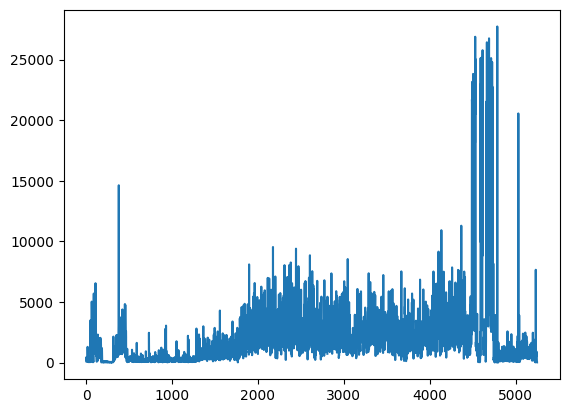

In [ ]:
df.distance.plot ()

<Axes: >

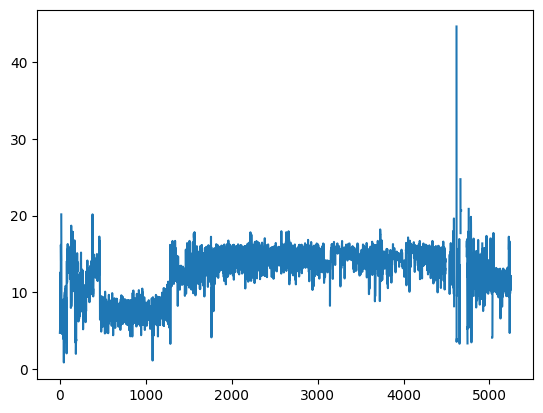

In [ ]:
df.stellar_magnitude.plot ()

<ipython-input-9-b1a8a771922a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.stellar_magnitude)


<Axes: xlabel='stellar_magnitude', ylabel='Density'>

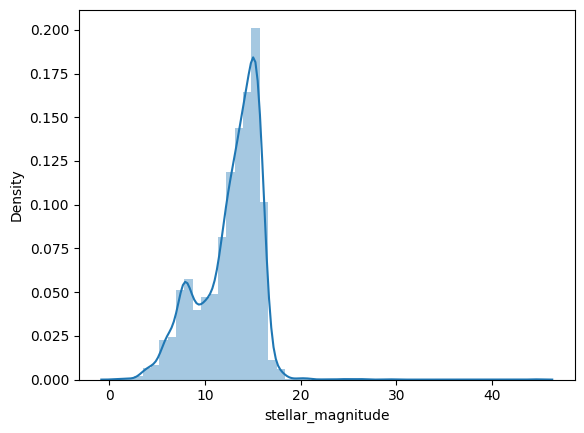

In [ ]:
sns.distplot(df.stellar_magnitude)

<Axes: >

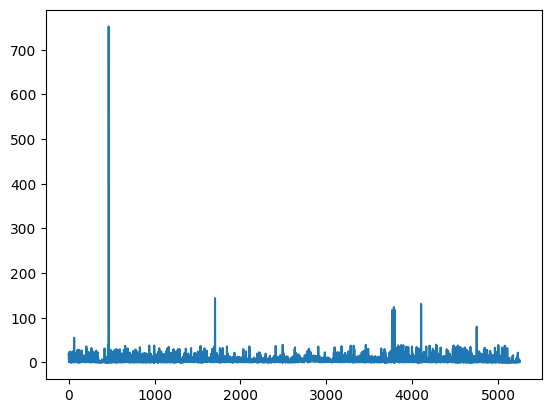

In [ ]:
df.mass_multiplier.plot ()

<Axes: >

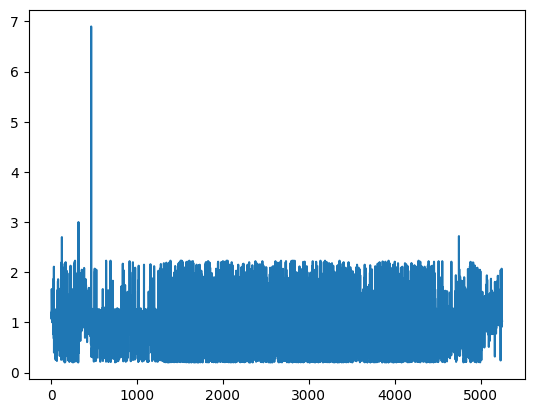

In [ ]:
df.radius_multiplier.plot ()

<Axes: >

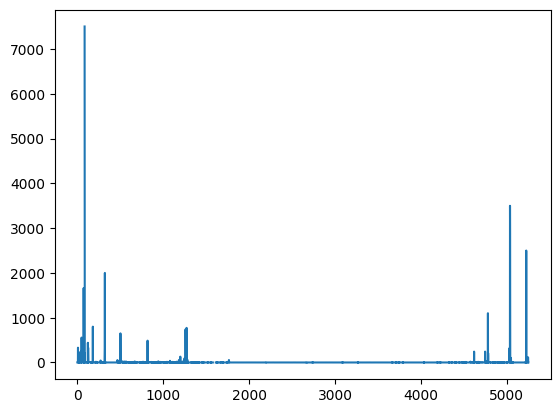

In [ ]:
df.orbital_radius.plot ()

In [ ]:
df['planet_type'].value_counts ()

Neptune-like    1825
Gas Giant       1630
Super Earth     1595
Terrestrial      195
Unknown            5
Name: planet_type, dtype: int64

<Axes: >

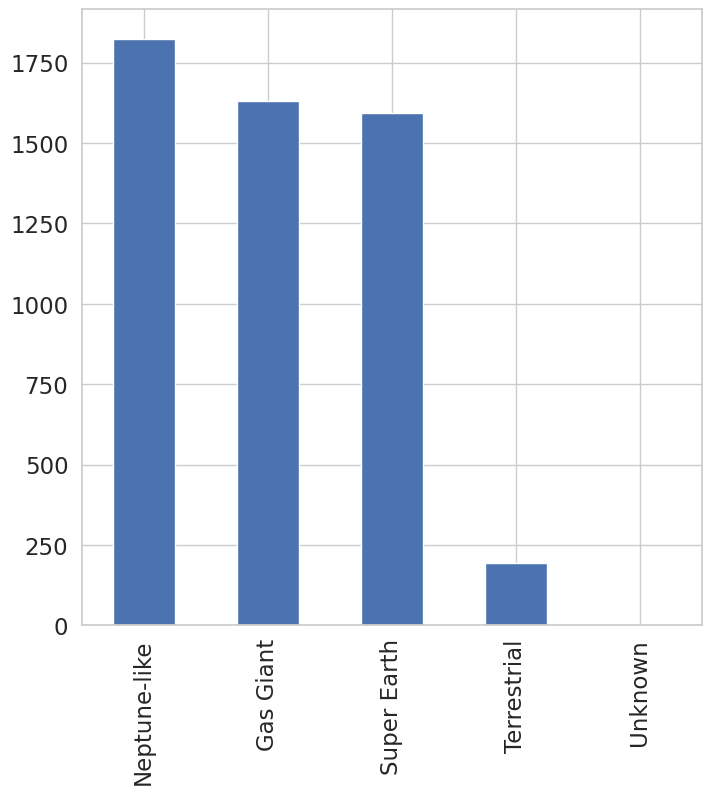

In [ ]:
df["planet_type"].value_counts ().plot (kind="bar",figsize=(8,8))

In [ ]:
df['detection_method'].value_counts ()

Transit                          3945
Radial Velocity                  1027
Gravitational Microlensing        154
Direct Imaging                     62
Transit Timing Variations          24
Eclipse Timing Variations          17
Orbital Brightness Modulation       9
Pulsar Timing                       7
Astrometry                          2
Pulsation Timing Variations         2
Disk Kinematics                     1
Name: detection_method, dtype: int64

In [ ]:
df['mass_wrt'].value_counts ()

Earth      3586
Jupiter    1641
Name: mass_wrt, dtype: int64

In [ ]:
df['radius_wrt'].value_counts ()

Jupiter    3310
Earth      1923
Name: radius_wrt, dtype: int64

<Axes: >

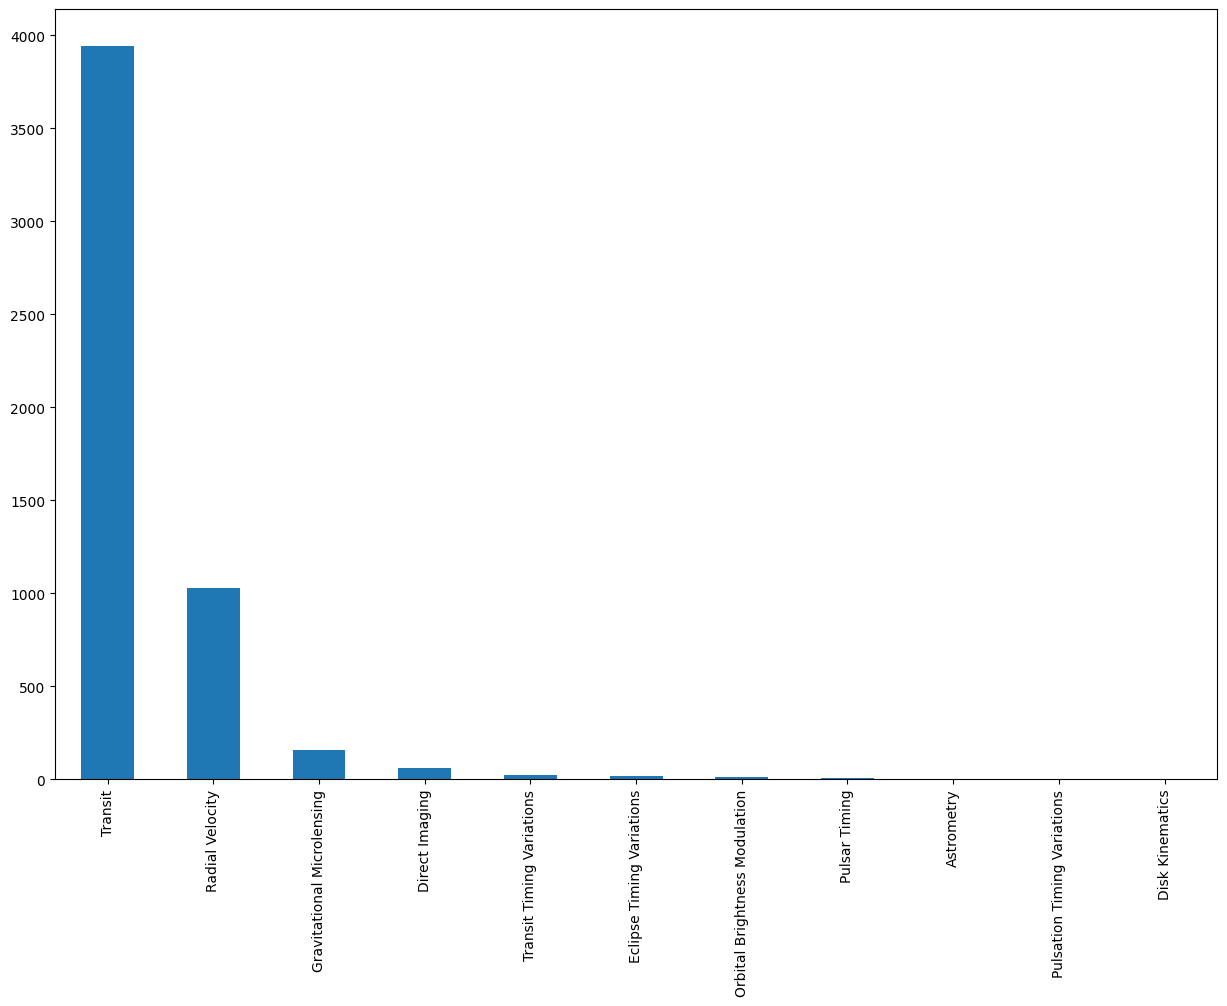

In [ ]:
df['detection_method'].value_counts().plot (kind="bar",figsize=(15,10))

In [ ]:
df.corr ()

<ipython-input-17-83a24363fc6f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr ()


,distance,stellar_magnitude,discovery_year,mass_multiplier,radius_multiplier,orbital_radius,orbital_period,eccentricity
distance,1.000000,0.614542,0.094017,0.017010,-0.035992,-0.026579,-0.017096,-0.213818
stellar_magnitude,0.614542,1.000000,0.218010,-0.024383,-0.049920,-0.015749,-0.000663,-0.469103
discovery_year,0.094017,0.218010,1.000000,0.037767,-0.070002,0.004178,0.012580,-0.152491
mass_multiplier,0.017010,-0.024383,0.037767,1.000000,-0.069347,0.022574,0.008640,0.012292
radius_multiplier,-0.035992,-0.049920,-0.070002,-0.069347,1.000000,0.014667,0.005994,0.025138
orbital_radius,-0.026579,-0.015749,0.004178,0.022574,0.014667,1.000000,0.952652,-0.008964
orbital_period,-0.017096,-0.000663,0.012580,0.008640,0.005994,0.952652,1.000000,-0.012117
eccentricity,-0.213818,-0.469103,-0.152491,0.012292,0.025138,-0.008964,-0.012117,1.000000


<ipython-input-18-da6372766386>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap  (df.corr ())


<Axes: >

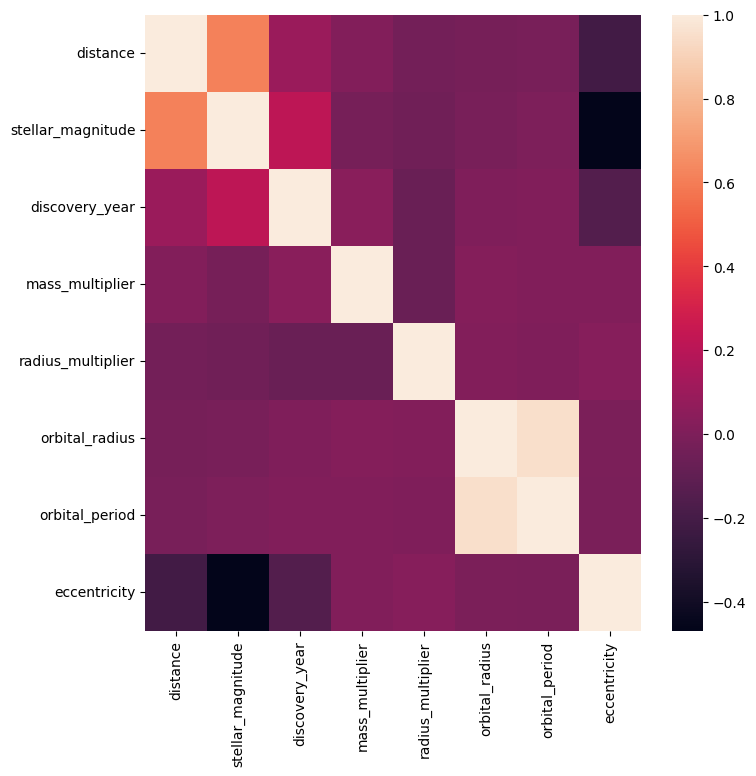

In [ ]:
plt.figure (figsize=(8,8))
sns.heatmap  (df.corr ())

In [ ]:
print (df.corr ()["stellar_magnitude"])

distance             0.614542
stellar_magnitude    1.000000
discovery_year       0.218010
mass_multiplier     -0.024383
radius_multiplier   -0.049920
orbital_radius      -0.015749
orbital_period      -0.000663
eccentricity        -0.469103
Name: stellar_magnitude, dtype: float64


<ipython-input-19-b9d0a0959d71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print (df.corr ()["stellar_magnitude"])


In [ ]:
print (df.corr ()["eccentricity"])

distance            -0.213818
stellar_magnitude   -0.469103
discovery_year      -0.152491
mass_multiplier      0.012292
radius_multiplier    0.025138
orbital_radius      -0.008964
orbital_period      -0.012117
eccentricity         1.000000
Name: eccentricity, dtype: float64


<ipython-input-20-eff551e759df>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print (df.corr ()["eccentricity"])


In [ ]:
print (df.corr ()["mass_multiplier"])

distance             0.017010
stellar_magnitude   -0.024383
discovery_year       0.037767
mass_multiplier      1.000000
radius_multiplier   -0.069347
orbital_radius       0.022574
orbital_period       0.008640
eccentricity         0.012292
Name: mass_multiplier, dtype: float64


<ipython-input-21-5db339ca8f7b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print (df.corr ()["mass_multiplier"])


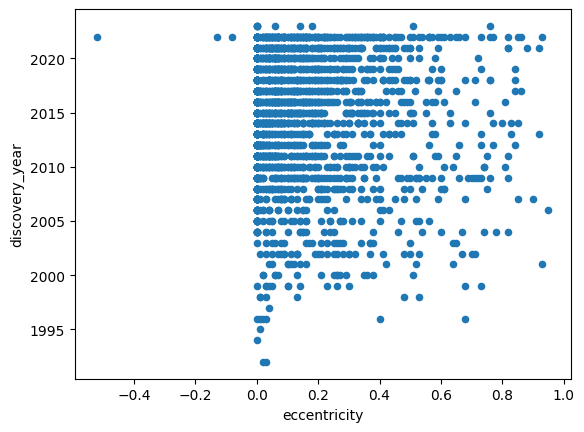

In [ ]:
df.plot.scatter (x='eccentricity',y='discovery_year')
plt.show  ()

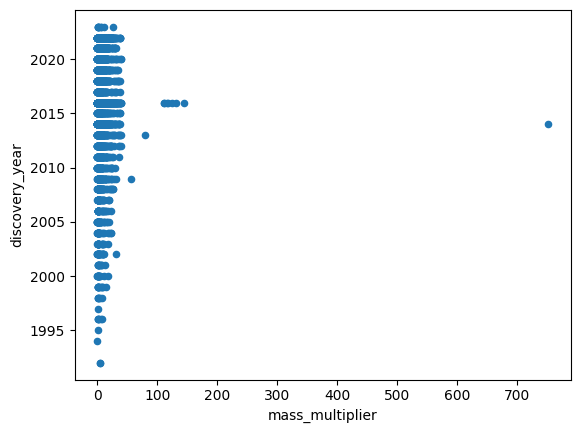

In [ ]:
df.plot.scatter(x='mass_multiplier',y='discovery_year')
plt.show  ()

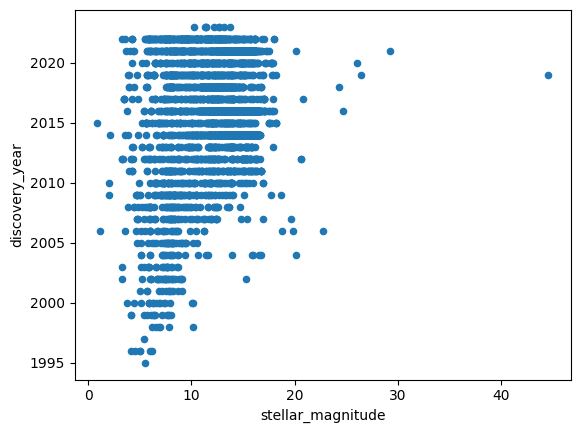

In [ ]:
df.plot.scatter(x='stellar_magnitude',y='discovery_year')
plt.show  ()

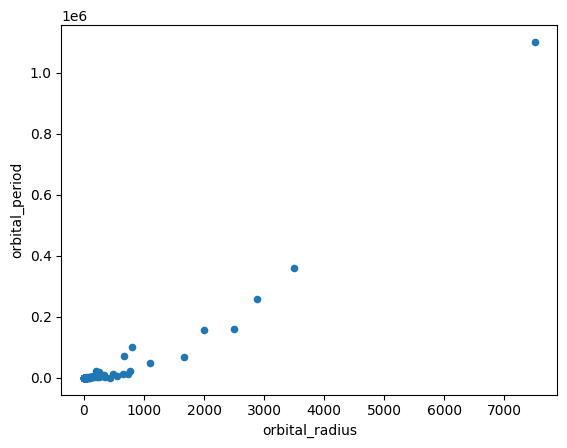

In [ ]:
df.plot.scatter(x='orbital_radius',y='orbital_period')
plt.show  ()

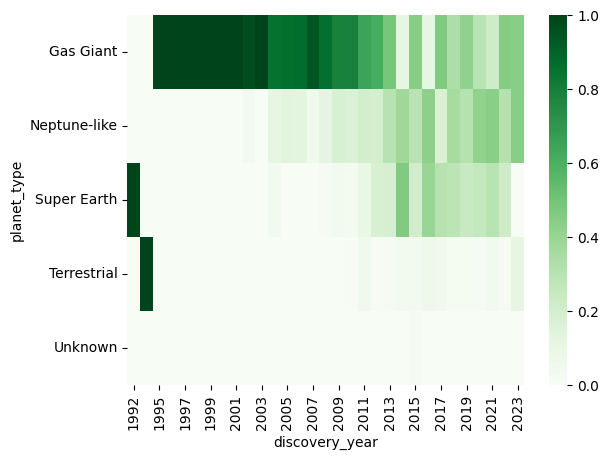

In [ ]:
contingency=pd.crosstab (df.planet_type,df.discovery_year)
probability =contingency/contingency.sum ()

sns.heatmap(probability, annot=False, cmap="Greens")
plt.show  ()

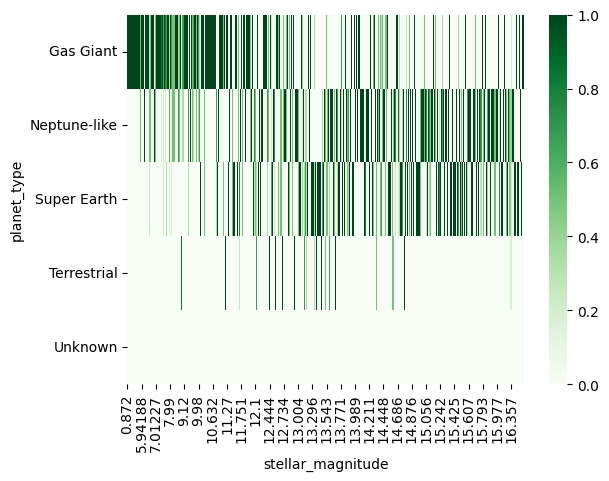

In [ ]:
contingency=pd.crosstab (df.planet_type,df.stellar_magnitude)
probability =contingency/contingency.sum ()

sns.heatmap(probability, annot=False, cmap="Greens")
plt.show  ()

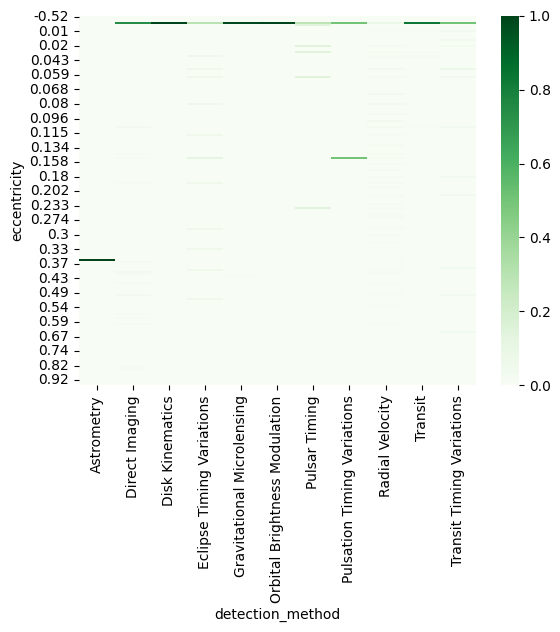

In [ ]:
contingency=pd.crosstab (df.eccentricity,df.detection_method)
probability =contingency/contingency.sum ()

sns.heatmap(probability, annot=False, cmap="Greens")
plt.show  ()

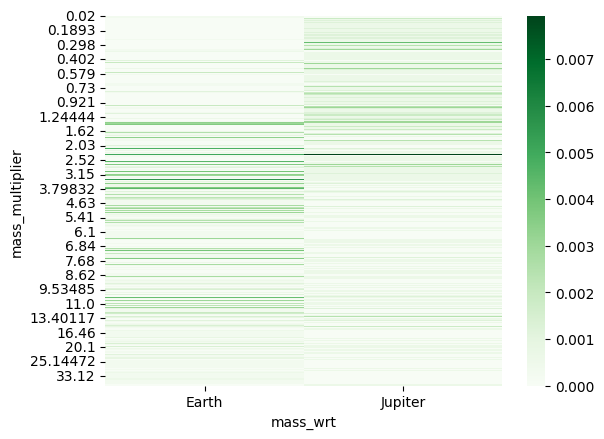

In [ ]:
contingency=pd.crosstab (df.mass_multiplier,df.mass_wrt)
probability =contingency/contingency.sum ()

sns.heatmap(probability, annot=False, cmap="Greens")
plt.show  ()

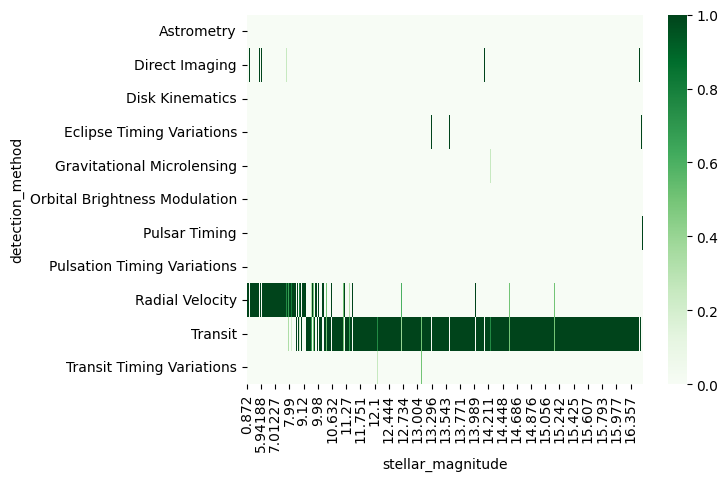

In [ ]:
contingency=pd.crosstab (df.detection_method,df.stellar_magnitude)
probability =contingency/contingency.sum ()

sns.heatmap(probability, annot=False, cmap="Greens")
plt.show  ()

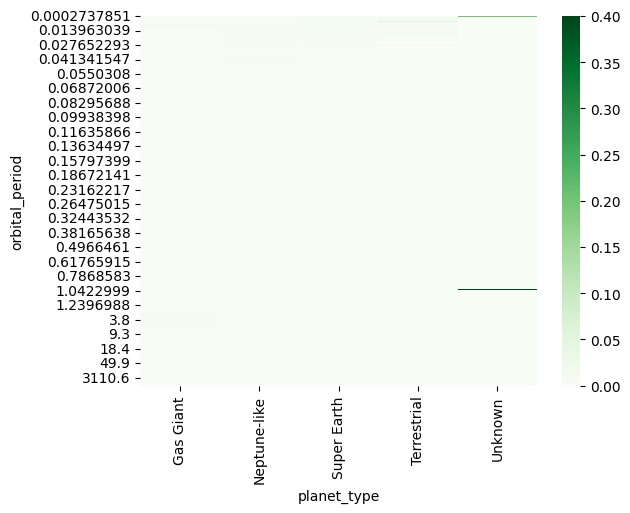

In [ ]:
contingency=pd.crosstab (df.orbital_period,df.planet_type)
probability =contingency/contingency.sum ()

sns.heatmap(probability, annot=False, cmap="Greens")
plt.show  ()

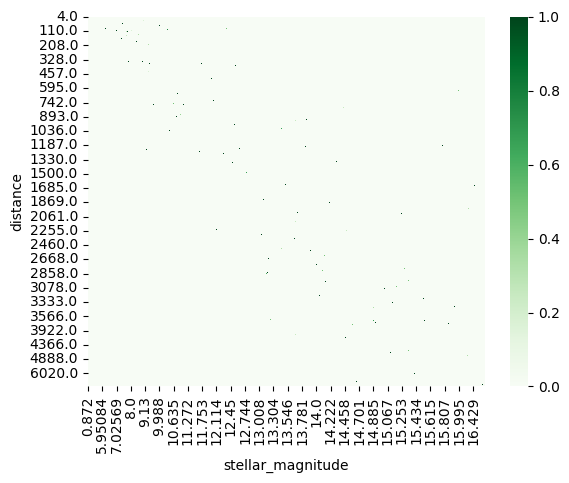

In [ ]:
contingency=pd.crosstab (df.distance,df.stellar_magnitude)
probability =contingency/contingency.sum ()

sns.heatmap(probability, annot=False, cmap="Greens")
plt.show  ()

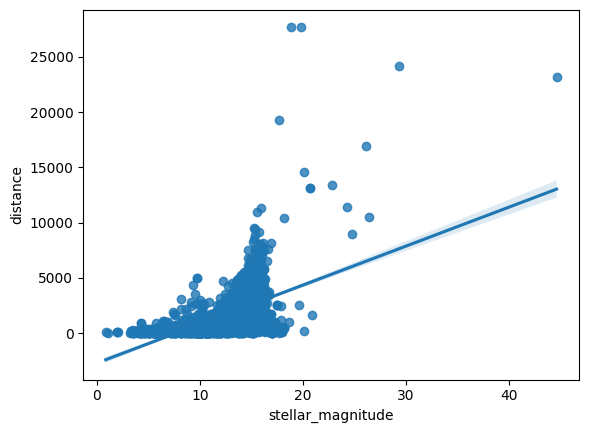

In [ ]:
sns.regplot (x='stellar_magnitude',y='distance',data=df)
plt.show  ()

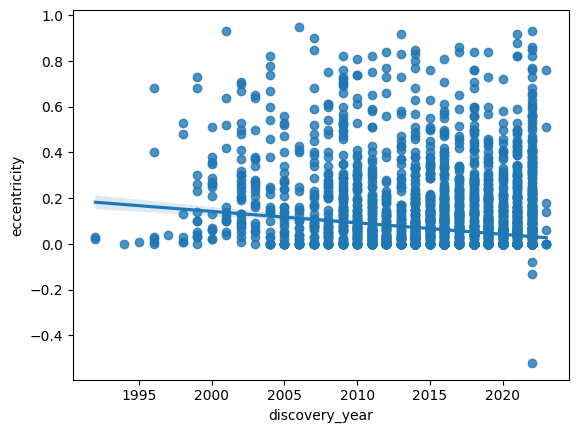

In [ ]:
sns.regplot (x='discovery_year',y='eccentricity',data=df)
plt.show  ()

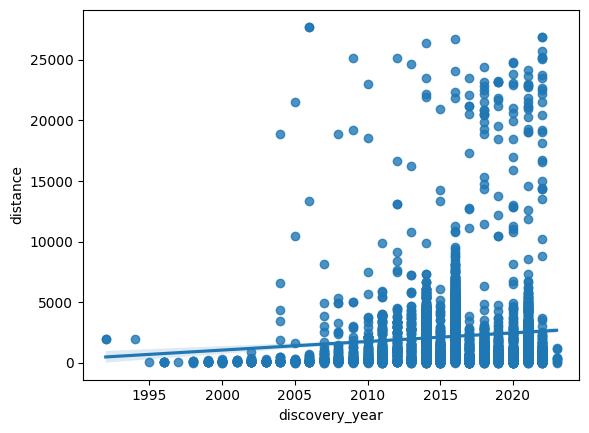

In [ ]:
sns.regplot (x='discovery_year',y='distance',data=df)
plt.show  ()

In [100]:
df['planet_type']=df['planet_type'].replace ({'Gas Giant':'0','Super Earth':'1','Neptune-like':'2','Terrestrial':'3','Unknown':'4'})
df['planet_type']

0       0
1       0
2       0
3       0
4       0
       ..
5245    0
5246    0
5247    3
5248    1
5249    1
Name: planet_type, Length: 5250, dtype: object

In [101]:
df['mass_wrt']=df['mass_wrt'].replace ({'Jupiter':'0','Earth':'1'})
df['mass_wrt']

0       0
1       0
2       0
3       0
4       0
       ..
5245    0
5246    0
5247    1
5248    1
5249    1
Name: mass_wrt, Length: 5250, dtype: object

In [102]:
df['radius_wrt']=df['radius_wrt'].replace ({'Jupiter':'0','Earth':'1'})
df['radius_wrt']

0       0
1       0
2       0
3       0
4       0
       ..
5245    0
5246    0
5247    1
5248    1
5249    1
Name: radius_wrt, Length: 5250, dtype: object

In [103]:
df['detection_method']=df['detection_method'].replace ({'Radial Velocity':'0', 'Direct Imaging':'1', 'Eclipse Timing Variations':'2','Transit':'3', 'Astrometry':'4', 'Disk Kinematics':'5','Transit Timing Variations':'6', 'Orbital Brightness Modulation':'7','Pulsation Timing Variations':'8', 'Gravitational Microlensing':'9','Pulsar Timing':'10'})
df ['detection_method']

0       0
1       0
2       0
3       0
4       0
       ..
5245    3
5246    1
5247    0
5248    0
5249    0
Name: detection_method, Length: 5250, dtype: object

In [104]:
df=df.drop (columns='name',axis=1)
df

,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,304.0,4.72307,0,2007,19.40000,0,1.080,0,1.290000,0.892539,0.23,0
1,409.0,5.01300,0,2009,14.74000,0,1.090,0,1.530000,1.400000,0.08,0
2,246.0,5.23133,0,2008,4.80000,0,1.150,0,0.830000,0.508693,0.00,0
3,58.0,6.61935,0,2002,8.13881,0,1.120,0,2.773069,4.800000,0.37,0
4,69.0,6.21500,0,1996,1.78000,0,1.200,0,1.660000,2.200000,0.68,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5245,764.0,10.52100,0,2019,0.70900,0,1.373,0,0.044210,0.007940,0.04,3
5246,357.0,10.88500,0,2021,6.30000,0,1.140,0,115.000000,1176.500000,0.00,1
5247,12.0,12.07400,3,2017,0.70000,1,0.913,1,0.016340,0.005476,0.06,0
5248,12.0,12.07400,1,2017,1.14000,1,1.050,1,0.021560,0.008487,0.00,0


In [105]:
df.dtypes

distance             float64
stellar_magnitude    float64
planet_type           object
discovery_year         int64
mass_multiplier      float64
mass_wrt              object
radius_multiplier    float64
radius_wrt            object
orbital_radius       float64
orbital_period       float64
eccentricity         float64
detection_method      object
dtype: object

In [106]:
df.shape

(5250, 12)

In [107]:
X=df.drop (columns='planet_type',axis=1)
y=df ['planet_type']

In [108]:
X.shape

(5250, 11)

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
# Create a logistic regression model for multi-class classification
model = LogisticRegression()

In [111]:

# Train the model
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [112]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [113]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.75


In [114]:
from sklearn.tree import DecisionTreeClassifier

Dt=DecisionTreeClassifier()
Dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [115]:
y_pred = Dt.predict(X_test)

In [116]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


In [117]:
from sklearn.ensemble import RandomForestClassifier

rdf=RandomForestClassifier()
rdf.fit (X_train,y_train)

RandomForestClassifier()

In [118]:
y_pred = rdf.predict(X_test)

In [119]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


In [120]:
from sklearn.svm import SVC

svc=SVC ()
svc.fit (X_train,y_train)

SVC()

In [121]:
y_pred = svc.predict(X_test)

In [122]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.44
